# Task 3 - Level 1 - Sentiment Analysis

The primary goal is to develop a sentiment analysis model that can accurately classify the sentiment of text data, providing valuable insights into public opinion, customer feedback, and social media trends.

 <b> Dataset</b> - https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

<b> Done By </b>- Shweta Alukuru Trikutam

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Loading and Understanding Dataset

In [2]:
df = pd.read_csv(r"C:\Users\shwet\Downloads\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.shape

(48895, 16)

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#### <b> Checking for Missing Values

In [6]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

> There are missing values present

#### <b> Descriptive Statistics

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 3. Handling Missing Values

In [8]:
# Fill missing 'name' and 'host_name' with 'Unknown'
df['name'].fillna("Unknown", inplace=True)
df['host_name'].fillna("Unknown", inplace=True)

In [9]:
# For 'reviews_per_month', fill missing values with 0, since it likely means no reviews
df['reviews_per_month'].fillna(0, inplace=True)


In [10]:
# Convert 'last_review' to datetime format, forcing errors to NaT
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [11]:
# Check for any conversion issues
print("\nUnique values in 'last_review' after conversion:", df['last_review'].unique())


Unique values in 'last_review' after conversion: <DatetimeArray>
['2018-10-19 00:00:00', '2019-05-21 00:00:00',                 'NaT',
 '2019-07-05 00:00:00', '2018-11-19 00:00:00', '2019-06-22 00:00:00',
 '2017-10-05 00:00:00', '2019-06-24 00:00:00', '2017-07-21 00:00:00',
 '2019-06-09 00:00:00',
 ...
 '2018-01-28 00:00:00', '2017-10-26 00:00:00', '2018-01-22 00:00:00',
 '2017-11-16 00:00:00', '2018-02-13 00:00:00', '2018-02-05 00:00:00',
 '2018-02-09 00:00:00', '2017-12-23 00:00:00', '2018-01-29 00:00:00',
 '2018-03-29 00:00:00']
Length: 1765, dtype: datetime64[ns]


In [12]:
# Fill missing 'last_review' with the minimum date in the cleaned column
min_date = df['last_review'].min()
df['last_review'].fillna(min_date, inplace=True)

## 4. Removing Duplicates

In [13]:
df.drop_duplicates(inplace=True)

## 5. Outlier Detection and Treatment

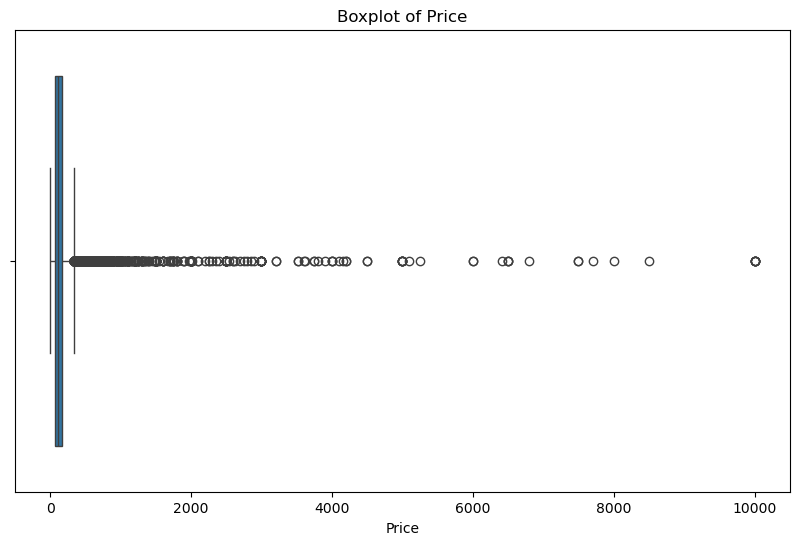

In [14]:
# Checking for Outliers for `Price`

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

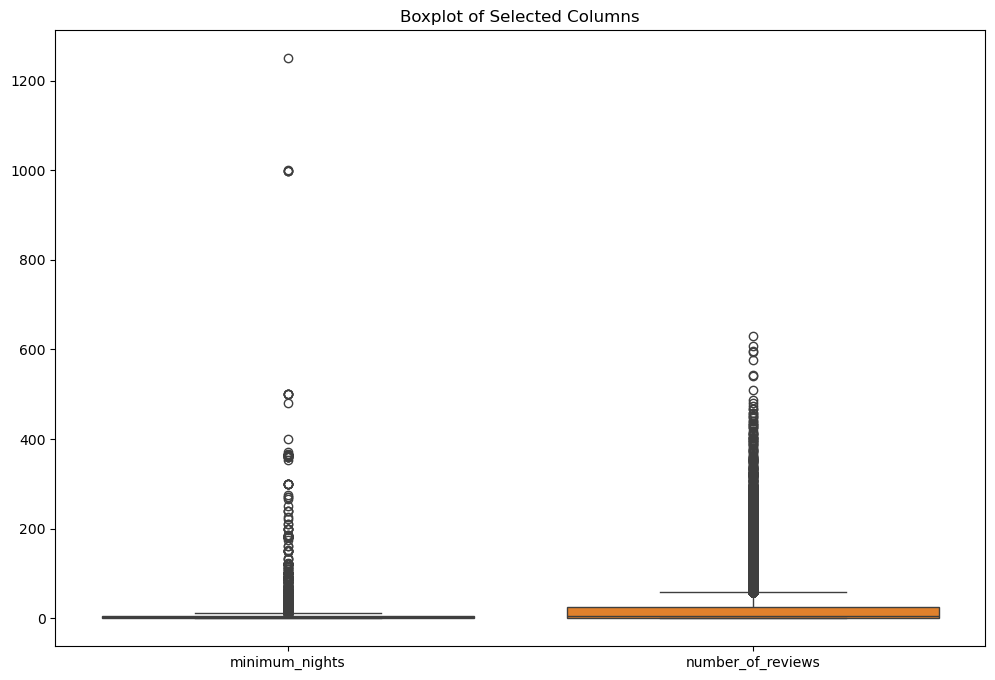

In [15]:
# Boxplot for Minimum_nights and number_of_reviews columns to identify outliers -
 
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['minimum_nights', 'number_of_reviews']])  
plt.title('Boxplot of Selected Columns')
plt.show()

#### <b> Removing Outliers

In [16]:
# Removing outliers in 'price' using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

In [17]:
# Removing outliers in 'minimum_nights' using IQR method 
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['minimum_nights'] >= (Q1 - 1.5 * IQR)) & (df['minimum_nights'] <= (Q3 + 1.5 * IQR))]


In [18]:
# Removing outliers in 'number_of_reviews' using IQR method 
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['number_of_reviews'] >= (Q1 - 1.5 * IQR)) & (df['number_of_reviews'] <= (Q3 + 1.5 * IQR))]

#### <b> ReChecking for Outliers

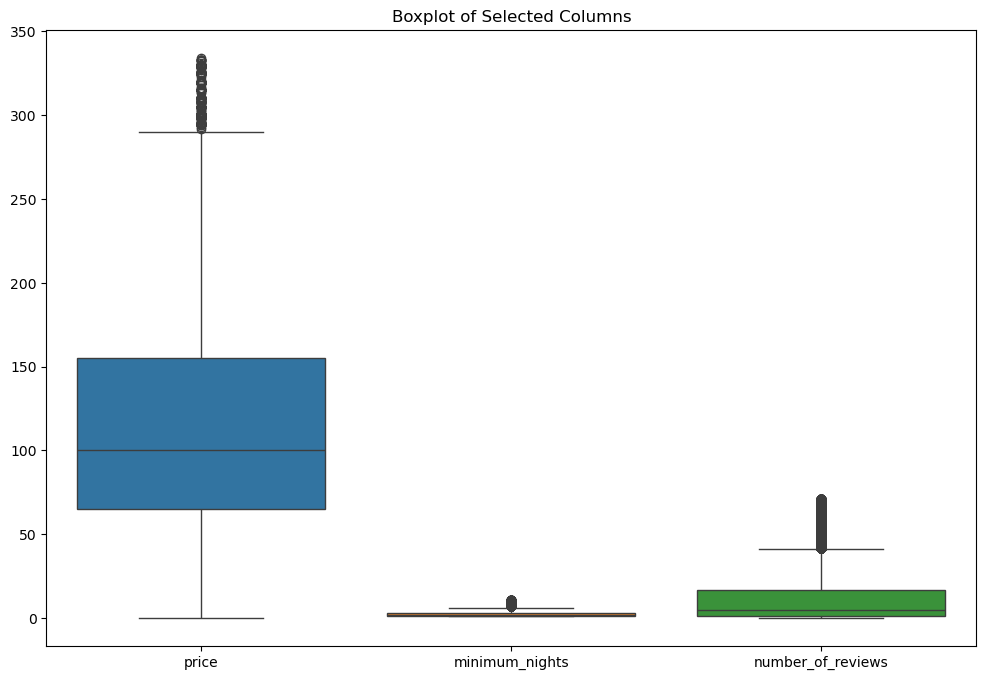

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['price','minimum_nights', 'number_of_reviews']])  
plt.title('Boxplot of Selected Columns')
plt.show()

## 6. Standardize Data

In [20]:
# Renaming columns to lowercase
df.columns = df.columns.str.lower()

## 7. Verification of the Cleaning Steps done

In [21]:
print("\nCleaned Data Types:\n", df.dtypes)



Cleaned Data Types:
 id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [22]:
print("\nCleaned Summary Statistics:\n", df.describe())


Cleaned Summary Statistics:
                  id       host_id      latitude     longitude         price  \
count  3.520200e+04  3.520200e+04  35202.000000  35202.000000  35202.000000   
mean   1.995514e+07  6.971067e+07     40.727684    -73.949547    119.289643   
min    2.539000e+03  2.571000e+03     40.499790    -74.244420      0.000000   
25%    1.032501e+07  8.615926e+06     40.688662    -73.981210     65.000000   
50%    2.094157e+07  3.294202e+07     40.720335    -73.953580    100.000000   
75%    2.965209e+07  1.113062e+08     40.763270    -73.932772    155.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990    334.000000   
std    1.068688e+07  7.986398e+07      0.056367      0.047451     67.831566   

       minimum_nights  number_of_reviews                    last_review  \
count    35202.000000       35202.000000                          35202   
mean         2.765042          12.362536  2017-04-01 21:52:46.797340928   
min          1.000000           0

In [23]:
print("\nRemaining Missing Values:\n", df.isnull().sum())



Remaining Missing Values:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


> <b> No missing values present

In [24]:
print("\nData Shape after Cleaning:", df.shape)


Data Shape after Cleaning: (35202, 16)


In [25]:
# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)